# 1.) Preprocess your data into scaled input variables and an output variable


In [6]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [7]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [8]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Week6/CLV.csv")


In [9]:
df.head()

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1


In [10]:
df.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.00000
mean,4566.500000,8004.940475,37657.380009,2.966170,434.088794,15.097000,0.103569,0.703306,0.490037,0.623823,0.047296,0.030874,0.253668,0.215459,0.743157,0.149880,0.580031,0.27009
std,2636.903013,6870.967608,30379.904734,2.390182,290.500092,10.073257,0.304717,0.456825,0.499928,0.484452,0.212282,0.172985,0.435133,0.411163,0.436916,0.356973,0.493581,0.44403
min,0.000000,1898.007675,0.000000,1.000000,0.099007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2283.250000,3994.251794,0.000000,1.000000,272.258244,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4566.500000,5780.182197,33889.500000,2.000000,383.945434,14.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000
75%,6849.750000,8962.167041,62320.000000,4.000000,547.514839,23.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000
max,9133.000000,83325.381190,99981.000000,9.000000,2893.239678,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [11]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train.shape

(6393, 16)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [45]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = MLPRegressor(max_iter = 1000, learning_rate_init = 0.5)

params = {
    "hidden_layer_sizes": [(10,), (20,5,),(50,10,),(100,15,)], 
    "activation" : ['relu','logistic','tanh']
}

In [ ]:
grid = GridSearchCV(clf, params, cv = 5, scoring = "neg_root_mean_squared_error")
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPRegressor(learning_rate_init=0.5, max_iter=1000),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [(10,), (20, 5), (50, 10),
                                                (100, 15)]},
             scoring='neg_root_mean_squared_error')

In [ ]:
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (100, 15)}


# 3.) Train a model with the optimal solution from GridSearch

In [46]:
best_model = MLPRegressor(max_iter = 1000, learning_rate_init = 0.5,
             activation = 'relu', hidden_layer_sizes = (100, 15))

In [47]:
best_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 15), learning_rate_init=0.5,
             max_iter=1000)

# 4.) What are the in-sample and out of sample MSEs

In [ ]:
-grid.best_score_

4780.132467323334

In [ ]:
mean_squared_error(
  y_train, 
  best_model.predict(X_train), 
  squared = False
  )

3853.8066566711495

In [48]:
from sklearn.metrics import mean_squared_error

mean_squared_error(
  y_test, 
  best_model.predict(X_test), 
  squared = False
  )

4756.833210962599

In-sample MSE is 3854, out-of-sample MSE is 4581.

# 5.) Build a Keras with the architecture defined by GridSearchCV

In [2]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

In [34]:
def create_model(optimizer='adam', activation='relu', neurons=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [35]:
model = KerasRegressor(build_fn=create_model, verbose=0)

<ipython-input-35-8d2d8e794dbc>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


In [36]:
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'sigmoid'],
    'neurons': [1, 5, 10, 20, 50]
}

In [37]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

In [38]:
-grid_result.best_score_

46194404.0

In [39]:
grid_result.best_params_

{'activation': 'relu', 'neurons': 50, 'optimizer': 'adam'}

In [43]:
mean_squared_error(
  y_train, 
  grid_result.predict(X_train), 
  squared = False
  )

6662.4106270277125

In [54]:
mean_squared_error(
  y_test, 
  grid_result.best_estimator_.predict(X_test), 
  squared = False
  )

6728.026283371787

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [62]:
from tensorflow.keras.utils import plot_model

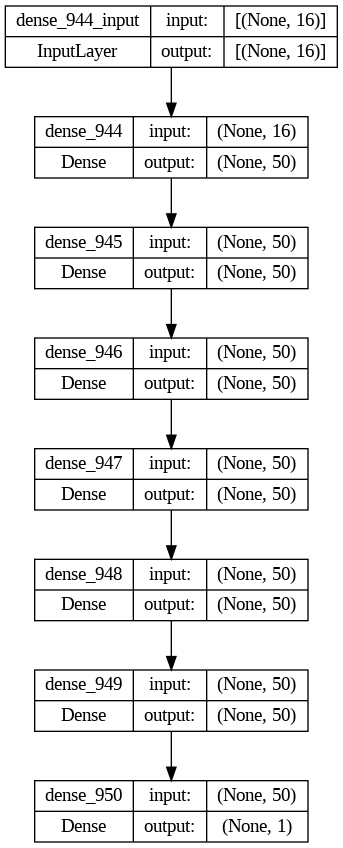

In [58]:
keras_model = grid_result.best_estimator_.model
plot_model(keras_model, show_shapes = True)

In [63]:
from ann_visualizer.visualize import ann_viz

In [68]:
ann_viz(keras_model, title = "CLV NN Viz", filename="network.gv")